In [1]:
import time
import math
import decimal
import pandas as pd
from pandas import DataFrame
from decimal import Decimal as dec
import seaborn as sns
import numpy as np
from numpy import random as np_rnd
import scipy
from scipy.stats.distributions import norm
import random as rnd
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot
from IPython.display import Latex
import networkx as nx 

%matplotlib notebook

In [2]:
VERTICES_COUNT = 100
EDGES_COUNT = 200

def initialize_adjacency_matrix():
    matrix = np.zeros((VERTICES_COUNT, VERTICES_COUNT))
    possible_positions = []
    for i in range(VERTICES_COUNT):
        for j in range(i + 1, VERTICES_COUNT):
            possible_positions.append({"i": i, "j": j})
    
    
    for _ in range(EDGES_COUNT):
        is_success = False
        
        while not is_success:
            choice = np_rnd.choice(possible_positions)
            if matrix[choice["i"]][choice["j"]] == 1:
                continue
            is_success = True
            matrix[choice["i"]][choice["j"]] = 1
            matrix[choice["j"]][choice["i"]] = 1
            
        is_success = False
    
    return matrix

def adjacency_matrix_to_list(matrix):
    result = []
    for col in matrix:
        t = []
        for i, item in enumerate(col):
            if item == 1:
                t.append(i)
        result.append(t)
    return result

In [35]:
adjacency_matrix = initialize_adjacency_matrix()
adjacency_list = adjacency_matrix_to_list(adjacency_matrix)

<IPython.core.display.Javascript object>


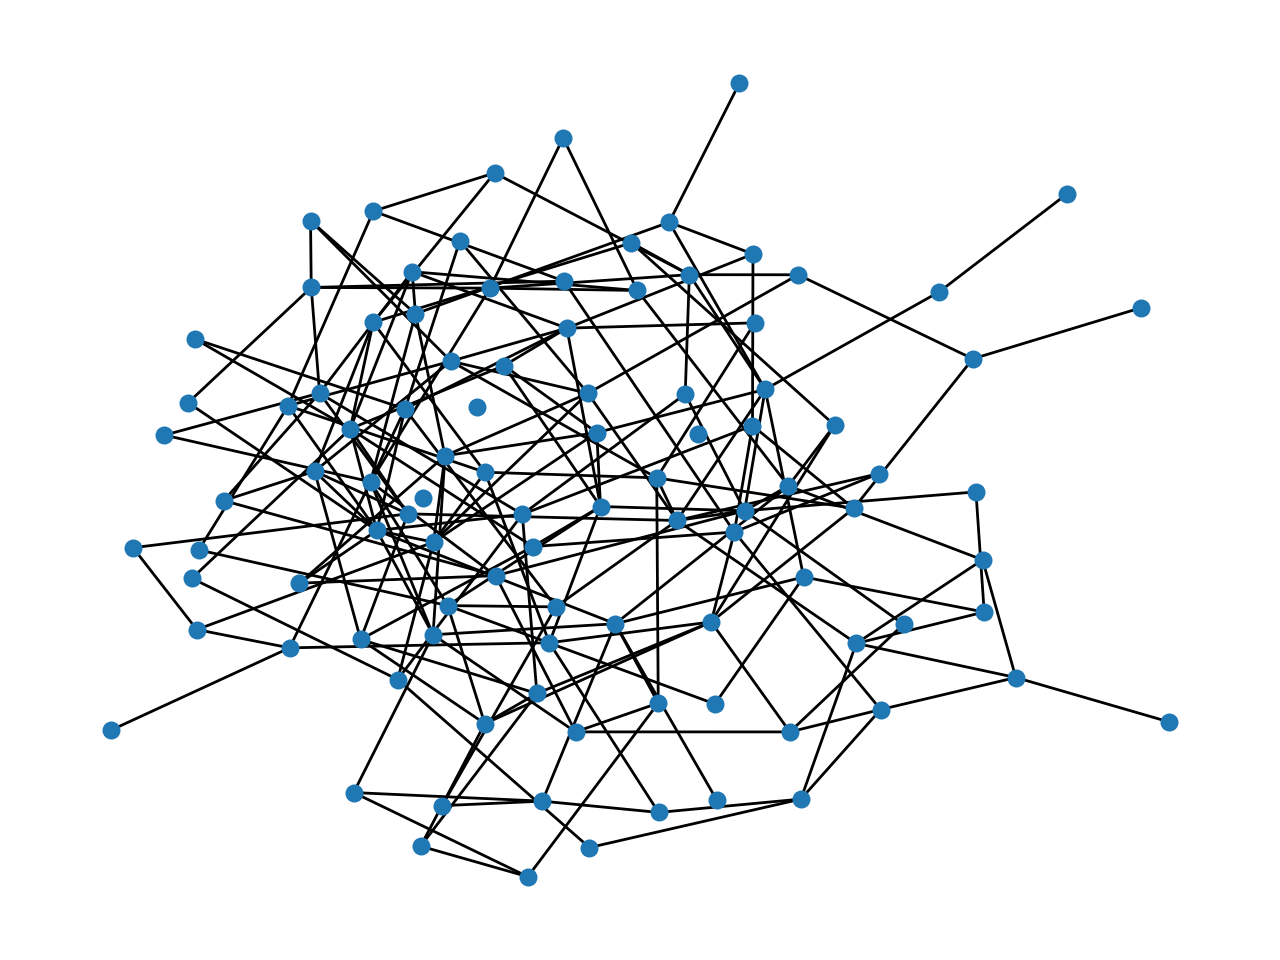

In [36]:
G = nx.Graph()
G.add_nodes_from(range(VERTICES_COUNT))
for i in range(VERTICES_COUNT): 
    for j in range(VERTICES_COUNT): 
        if adjacency_matrix[i][j] == 1: 
            G.add_edge(i, j)

positions = nx.kamada_kawai_layout(G)
nx.draw(G, node_size=30, pos = positions) 
plt.show()

In [37]:

display(DataFrame([[int(zz) for zz in col[:10]] for col in adjacency_matrix[:10]]))

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0


In [38]:
display(DataFrame([", ".join([str(vv) for vv in vertex]) for vertex in adjacency_list[:10]], columns=["adjacency vertices"]))

,adjacency vertices
0,"15, 38, 60, 67, 84, 89"
1,6
2,49
3,"12, 48, 85"
4,"25, 44, 49, 80"
5,"12, 22, 56, 75, 85, 88, 89"
6,"1, 44"
7,"59, 92"
8,"31, 32, 42, 53, 59, 65, 98"
9,


In [40]:
def dfs_connected_components(adj_list):
    result = {}
    label = -1
    visited = np.full(VERTICES_COUNT, False)
    
    def dfs(at):
        visited[at] = True
        result[label].append(at)
        
        for nxt in adj_list[at]:
            if not visited[nxt]:
                dfs(nxt)
    
    for n, conns in enumerate(adj_list):
        if not visited[n]:
            label += 1
            result[label] = []
            dfs(n)
    
    return result

In [41]:
clusters = dfs_connected_components(adjacency_list)
display(DataFrame([(clust_key,\
  len(clusters[clust_key]),\
  ", ".join([str(ff) for ff in clusters[clust_key][:8]])\
  + ("..." \
      if len(clusters[clust_key]) > 7 \
      else "") )\
 for clust_key in clusters], columns=["Component №", "Number of vertices", "Vertices in component"]))

,Component №,Number of vertices,Vertices in component
0,0,97,"0, 15, 12, 3, 48, 17, 38, 24..."
1,1,1,9
2,2,1,36
3,3,1,50


In [42]:
def bfs_shortest_path(adj_list, s, e):
    prev = bfs_solve(adj_list, s)
    
    return bfs_reconstruct_path(s, e, prev)

def bfs_solve(adj_list, s):
    q = [s]
    
    visited = np.full(VERTICES_COUNT, False)
    visited[s] = True
    
    prev = np.full(VERTICES_COUNT, None)
    while len(q) > 0:
        node = q.pop(0)
        neighbours = adj_list[node]
        
        for nxt in neighbours:
            if not visited[nxt]:
                q.append(nxt)
                visited[nxt] = True
                prev[nxt] = node
    
    return prev

def bfs_reconstruct_path(s, e, prev):
    path = []
    at = e
    while at is not None:
        path.append(at)
        at = prev[at]
        
    path.reverse()
    
    return path if path[0] == s else []

In [43]:
bfs_data = []
for i in range(4):
    s, e = np_rnd.randint(VERTICES_COUNT), np_rnd.randint(VERTICES_COUNT)
    r = bfs_shortest_path(adjacency_list, s, e)
    bfs_data.append((i, s, e,\
                     "Yes" if len(r) > 0 else "No",\
                     len(r),\
                     ", ".join([str(ff) for ff in r[:8]])\
  + ("..." \
      if len(r) > 7 \
      else "")))

display(DataFrame(bfs_data, columns=["Run №", "Start node", "End node", "Path exists", "Path length", "Path"]))

,Run №,Start node,End node,Path exists,Path length,Path
0,0,98,35,Yes,4,"98, 8, 32, 35"
1,1,88,11,Yes,4,"88, 44, 37, 11"
2,2,76,51,Yes,6,"76, 64, 33, 79, 70, 51"
3,3,0,48,Yes,4,"0, 38, 17, 48"
